# Import Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1
### Variable initialization

In [6]:
x=[{"x": -1,"y": 0},{"x": 0,"y": 0.25},{"x": 1,"y": 1},{"x": 1,"y": -1}]
y=[-1,1,1,-1]
w_old=[0,0,0,0]
w_new=[0,0,0,0]
k=0
b=0
phi=1
epoch=0
convergence=False

#### 1-

In [7]:
while convergence==False:
    for i in range(len(y)):
        pred=np.sign(phi*w_old[i])
        if pred!=y[i]:
            w_new[i]=w_old[i]+y[i]*phi
            k+=1
    epoch+=1
    convergence = True
    for i in range(len(y)):
        if w_old[i]!=w_new[i]:
            convergence=False
        w_old[i]=w_new[i]
    

In [8]:
print("Epochs:",epoch,"\nResult:",w_new)

Epochs: 2 
Result: [-1, 1, 1, -1]


#### 2-

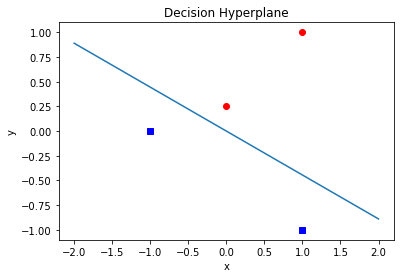

In [9]:
attributes=np.matrix('-1 0 ; 1 1 ; 0 0.25 ; 1 -1')
w_final=np.array(w_new)

hyperplane=np.matmul(w_final,attributes);

slope=(-hyperplane[0,0])/hyperplane[0,1]

x_hyperplane=np.linspace(-2,2,100)
y_hyperplane=slope*x_hyperplane + b

x_plot_t=[x[1]["x"],x[2]["x"]]
y_plot_t=[x[1]["y"],x[2]["y"]]
x_plot_f=[x[0]["x"],x[3]["x"]]
y_plot_f=[x[0]["y"],x[3]["y"]]
plt.plot(x_plot_t,y_plot_t,'ro',x_plot_f,y_plot_f,'bs',x_hyperplane,y_hyperplane)
plt.title('Decision Hyperplane')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

#### 3-

Perceptron defined it as class 1.0


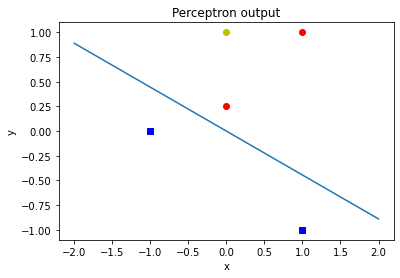

In [10]:
y_hat=np.sign(np.matmul(hyperplane,np.array([0,1]).T) + b)
plt.plot(x_plot_t,y_plot_t,'ro',x_plot_f,y_plot_f,'bs',x_hyperplane,y_hyperplane)
plt.plot(0,1,'oy')
plt.title('Perceptron output')
plt.xlabel('x')
plt.ylabel('y')
print("Perceptron defined it as class",y_hat[0,0])

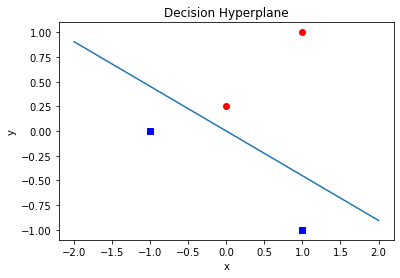

In [11]:
w = np.random.randn(4)
w_final=np.array(w)

hyperplane=np.matmul(w_final,attributes);

slope=(-hyperplane[0,0])/hyperplane[0,1]

x_hyperplane=np.linspace(-2,2,100)
y_hyperplane=slope*x_hyperplane + b

x_plot_t=[x[1]["x"],x[2]["x"]]
y_plot_t=[x[1]["y"],x[2]["y"]]
x_plot_f=[x[0]["x"],x[3]["x"]]
y_plot_f=[x[0]["y"],x[3]["y"]]
plt.plot(x_plot_t,y_plot_t,'ro',x_plot_f,y_plot_f,'bs',x_hyperplane,y_hyperplane)
plt.title('Decision Hyperplane')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# P2

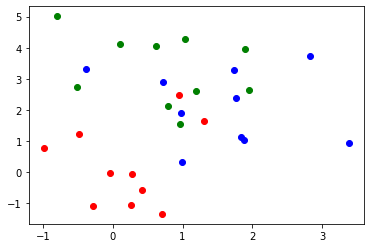

In [12]:
sigma = np.array([1 , 1 , 1])
mew = np.array([[0 , 0] , [0 , 3] , [2 , 2]])
inputs0 = np.array(mew[0].T) + np.random.randn(10, 2)
inputs1 = np.array(mew[1].T) + np.random.randn(10, 2)
inputs2 = np.array(mew[2].T) + np.random.randn(10, 2)
inputs = np.concatenate([inputs0,inputs1,inputs2], axis = 0)

labels = np.array([0] * 10 + [1] * 10 + [2] * 10)

plt.plot(inputs[labels == 0,0],inputs[labels == 0,1],'ro')
plt.plot(inputs[labels == 1,0],inputs[labels == 1,1],'go')
plt.plot(inputs[labels == 2,0],inputs[labels == 2,1],'bo')

num_examples, num_features = np.shape(inputs)
num_labels = 3

In [13]:
# One epoch of the multi-class perceptron algorithm.
def multi_class_perceptron_epoch(inputs, labels, W, eta=1):
    mistakes = 0
    for x, y in zip(inputs, labels):
        # Sign function.
        y_hat = np.argmax(W.dot(x))
        if y_hat != y:
            mistakes += 1
            # Perceptron update.
            W[y, :] += eta * x
            W[y_hat, :] -= eta * x
    print("Mistakes: %d" % mistakes)
    return mistakes

In [14]:
# Run classifier.
def multi_class_classify(inputs, W):
    predicted_labels = []
    for x in inputs:
        y_hat = np.argmax(W.dot(x))
        predicted_labels.append(y_hat)
    predicted_labels = np.array(predicted_labels)
    return predicted_labels

In [15]:
def accuracy_calculator(y,y_pred):
    correct = 0
    for i in range(len(y)):
        if y[i]==y_pred[i]:
            correct += 1
    return correct/(i+1)

Mistakes: 2
Epoch: 0 Accuracy was: 0.4666666666666667 
Labels:

 [[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
 [2 2 0 2 2 0 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]]
Mistakes: 6
Epoch: 1 Accuracy was: 0.5333333333333333 
Labels:

 [[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
 [2 2 0 0 2 0 0 0 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]]
Mistakes: 4
Epoch: 2 Accuracy was: 0.5333333333333333 
Labels:

 [[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
 [2 2 0 0 2 0 0 0 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]]
Mistakes: 4
Epoch: 3 Accuracy was: 0.5666666666666667 
Labels:

 [[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
 [2 1 0 0 2 0 0 0 1 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2]]
Mistakes: 5
Epoch: 4 Accuracy was: 0.6 
Labels:

 [[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
 [2 0 0 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]]
Mistakes: 4
Epoch: 5 Accuracy was: 0.6 
Labels:

 [[0 0

Epoch: 80 Accuracy was: 0.5666666666666667 
Labels:

 [[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
 [2 0 0 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2]]
Mistakes: 7
Epoch: 81 Accuracy was: 0.5666666666666667 
Labels:

 [[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
 [2 0 0 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2]]
Mistakes: 7
Epoch: 82 Accuracy was: 0.5333333333333333 
Labels:

 [[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
 [2 2 0 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2]]
Mistakes: 5
Epoch: 83 Accuracy was: 0.5666666666666667 
Labels:

 [[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
 [2 0 0 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2]]
Mistakes: 5
Epoch: 84 Accuracy was: 0.5666666666666667 
Labels:

 [[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
 [2 0 0 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2]]
Mistakes: 5
Epoch: 85 Accuracy was: 0.6 
Labels

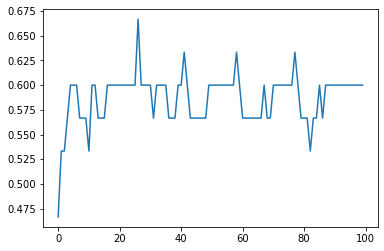

In [16]:
w = np.zeros((num_labels, num_features+1))
eta = 1
compounded_mistakes=0
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)
accuracy = [0] * 100
for i in range(100):
    compounded_mistakes += int(multi_class_perceptron_epoch(inputs,labels,w,eta))
    y_predicted = multi_class_classify(inputs,w)
    accuracy[i] = accuracy_calculator(labels,y_predicted)
    print("Epoch:",i,"Accuracy was:", accuracy[i],"\nLabels:\n\n",np.concatenate([(labels,y_predicted)],axis=0))

print("There were",compounded_mistakes,"mistakes done by the perceptron")
plt.plot(range(100), accuracy)

# P3

In [20]:
# One epoch of the multi-class perceptron algorithm.
def perceptron_epoch(inputs, labels, W, eta=1):
    mistakes = 0
    for x, y in zip(inputs, labels):
        # Sign function.
        y_hat = 1 if w.dot(x) >= 0 else -1
        if y_hat != y:
            mistakes += 1
            # Perceptron update.
            W += eta * y * x
    print("Mistakes: %d" % mistakes)


In [18]:
# NOT
inputs = np.array([[-1], [1]])
labels = np.array([1, -1])

num_examples, num_features = np.shape(inputs)

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)

print(inputs)
print(labels)

# Initialize all weights to 0 (including the bias)
w = np.zeros(num_features + 1)

# Learning rate.
eta = 1  
    
# Run 10 epochs of perceptron.
for epoch in range(10):
    perceptron_epoch(inputs, labels, w, eta)
    print(w)
print(w.dot(1)[0])
print(w.dot(-1)[0])

[[ 1. -1.]
 [ 1.  1.]]
[ 1 -1]
Mistakes: 1
[-1. -1.]
Mistakes: 0
[-1. -1.]
Mistakes: 0
[-1. -1.]
Mistakes: 0
[-1. -1.]
Mistakes: 0
[-1. -1.]
Mistakes: 0
[-1. -1.]
Mistakes: 0
[-1. -1.]
Mistakes: 0
[-1. -1.]
Mistakes: 0
[-1. -1.]
Mistakes: 0
[-1. -1.]
-1.0
1.0


In [19]:
# Plot separation line associated with model w, along with the data.
def plot_separation_line(inputs, labels, w):
    # Plot data.
    plt.plot(inputs[labels == -1, 1], inputs[labels == -1, 2], "b.")
    plt.plot(inputs[labels == 1, 1], inputs[labels == 1, 2], "r.")
    # Plot model separation line.
    # w0 + w1*x1 + w2*x2 = 0.
    x1 = np.array([-2, 2])
    x2 = (-w[0] - w[1]*x1) / w[2]
    plt.plot(x1, x2, 'k--')
    plt.show()

[[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]]
[-1  1  1 -1]
[[ 1. -1. -1.]
 [ 1. -1.  1.]
 [ 1.  1. -1.]
 [ 1.  1.  1.]]
[-1  1  1 -1]
Mistakes: 4
[0. 0. 0.]
Mistakes: 4
[0. 0. 0.]
Mistakes: 4
[0. 0. 0.]
Mistakes: 4
[0. 0. 0.]
Mistakes: 4
[0. 0. 0.]
Mistakes: 4
[0. 0. 0.]
Mistakes: 4
[0. 0. 0.]
Mistakes: 4
[0. 0. 0.]
Mistakes: 4
[0. 0. 0.]
Mistakes: 4
[0. 0. 0.]


C:\Users\Asus\AppData\Local\Temp/ipykernel_45660/2641786522.py:9: RuntimeWarning: invalid value encountered in true_divide
  x2 = (-w[0] - w[1]*x1) / w[2]


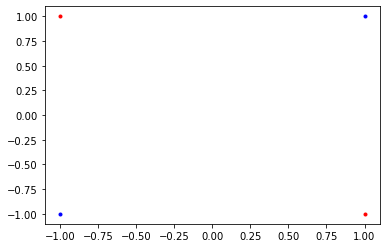

In [23]:
inputs = np.array([[-1,-1], [-1,1],[1,-1],[1,1]])
#labels = np.array([-1,-1,-1,1]) #AND
#labels = np.array([-1,1,1,1]) #OR
labels = np.array([-1,1,1,-1]) #XOR
print(inputs)
print(labels)

num_examples, num_features = np.shape(inputs)

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)

print(inputs)
print(labels)

# Initialize all weights to 0 (including the bias)
w = np.zeros(num_features + 1)

# Learning rate.
eta = 1  
    
# Run 10 epochs of perceptron.
for epoch in range(10):
    perceptron_epoch(inputs, labels, w, eta)
    print(w)
plot_separation_line(inputs,labels,w)

In [44]:
from sklearn.datasets import load_digits
data = load_digits()

In [45]:
inputs = data.data  # num_examples x num_features
labels = data.target  # num_examples x num_labels

num_examples, num_features = np.shape(inputs)
num_labels = np.max(labels)+1  # labels are 0, 1, ..., num_labels-1

# Augment points with a dimension for the bias.
inputs = np.concatenate([np.ones((num_examples, 1)), inputs], axis=1)

print(inputs)
print(labels)

print(data.DESCR)

[[ 1.  0.  0. ...  0.  0.  0.]
 [ 1.  0.  0. ... 10.  0.  0.]
 [ 1.  0.  0. ... 16.  9.  0.]
 ...
 [ 1.  0.  0. ...  6.  0.  0.]
 [ 1.  0.  0. ... 12.  0.  0.]
 [ 1.  0.  0. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted for

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<Figure size 432x288 with 0 Axes>

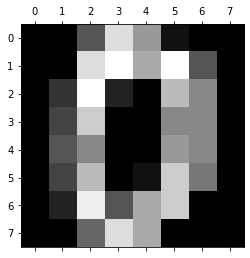

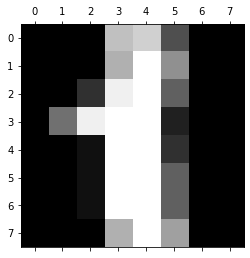

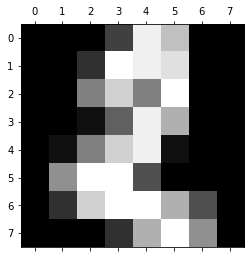

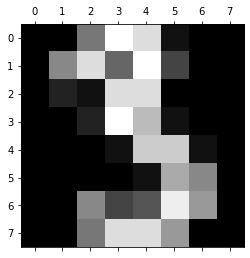

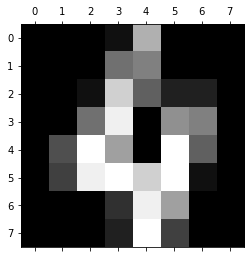

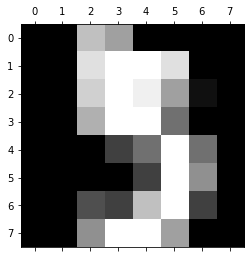

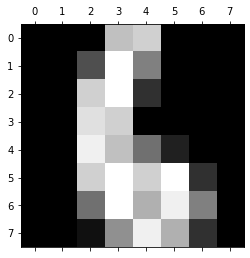

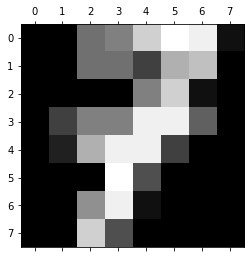

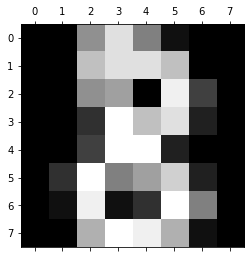

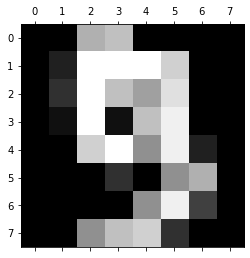

In [46]:
print(data.DESCR)
import matplotlib.pyplot as plt
plt.gray()
for i in range(10):
    plt.matshow(data.images[i])
plt.show()

In [47]:
# Split between train and test data.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)

In [35]:
# Compute accuracy of predicted labels.
def evaluate(predicted_labels, gold_labels):
    accuracy = np.mean(predicted_labels == gold_labels)
    return accuracy

Epoch 1
Mistakes: 3
Accuracy (training set): 0.333333
Accuracy (test set): 0.000000

Epoch 2
Mistakes: 2
Accuracy (training set): 0.333333
Accuracy (test set): 0.000000

Epoch 3
Mistakes: 2
Accuracy (training set): 0.333333
Accuracy (test set): 0.000000

Epoch 4
Mistakes: 2
Accuracy (training set): 0.333333
Accuracy (test set): 0.000000

Epoch 5
Mistakes: 2
Accuracy (training set): 0.333333
Accuracy (test set): 0.000000

Epoch 6
Mistakes: 2
Accuracy (training set): 0.333333
Accuracy (test set): 0.000000

Epoch 7
Mistakes: 2
Accuracy (training set): 0.333333
Accuracy (test set): 0.000000

Epoch 8
Mistakes: 2
Accuracy (training set): 0.333333
Accuracy (test set): 0.000000

Epoch 9
Mistakes: 2
Accuracy (training set): 0.333333
Accuracy (test set): 0.000000

Epoch 10
Mistakes: 2
Accuracy (training set): 0.333333
Accuracy (test set): 0.000000

Epoch 11
Mistakes: 2
Accuracy (training set): 0.333333
Accuracy (test set): 0.000000

Epoch 12
Mistakes: 2
Accuracy (training set): 0.333333
Accuracy

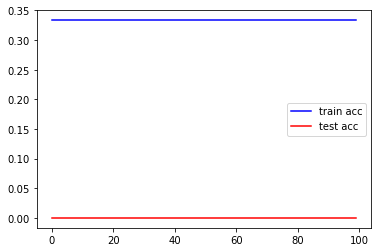

In [36]:
# Initialize all weights to 0 (including the bias)
W = np.zeros((num_labels, num_features+1))  # num_labels x (num_features + 1)

# Learning rate.
eta = 1  
    
# Run 100 epochs of perceptron.
train_accuracies = []
test_accuracies = []
for epoch in range(100):
    print("Epoch %d" % (epoch + 1))

    # Run 1 epoch of training.
    multi_class_perceptron_epoch(X_train, y_train, W, eta)
    
    # Predict on training set and evaluate.
    predicted_labels = multi_class_classify(X_train, W)
    accuracy = evaluate(predicted_labels, y_train)
    print("Accuracy (training set): %f" % accuracy)
    train_accuracies.append(accuracy)
    
    # Predict on test set and evaluate.
    predicted_labels = multi_class_classify(X_test, W)
    accuracy = evaluate(predicted_labels, y_test)
    print("Accuracy (test set): %f\n" % accuracy)
    test_accuracies.append(accuracy)
    
# Plot train and test accuracies as a function of number of epochs.
plt.plot(range(100), train_accuracies, 'b-', label='train acc')
plt.plot(range(100), test_accuracies, 'r-', label='test acc')
plt.legend()
plt.show()